# 16 Dynamic Programming II

## Plan for the Lecture

1. Recap on DP strategies (top-down vs bottom-up)

2. DP applied to Shortest Paths (DAGs)

3. Network Flow - capacity - minimax and maximin

4. Other examples - 21/Blackjack + Super Mario! 

## Recap: Top-down vs Bottom-up DP

* Dynamic Programming is a 'style' of programming (algorithms). 

* Top-down approaches apply memoization - store previously computed problems to enable reuse (fibonacci example)

* Bottom-up approaches are iterative - construct solutions to smaller subproblems, and then use these solutions to construct solutions to larger problems. 

<!--![top_down_vs_bottom_up](https://techdifferences.com/wp-content/uploads/2018/06/top-down-vs-bottom-up.jpg)-->

![top_vs_bottom](https://files.codingninjas.in/article_images/custom-upload-1687254632-4fa85c47.webp)

## Recap: Fibonacci example

$F(n) = F(n-1) + F(n-2)$    for $n >=2 $ 

* Drawing the recursion stack: 

![Recursive_fib_tree](https://i.sstatic.net/8O0eb.jpg)

In [6]:
fib_naive_count = 0

def fib_naive(n):
    global fib_naive_count
    fib_naive_count += 1 
    
    if n == 0: 
        return 0;     #base case F(0) = 0
    if n == 1: 
        return 1;     #base case F(1) = 0
    return fib_naive(n - 1) + fib_naive(n - 2);     #recursive call

In [7]:
for i in range (0,15):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 9 operations to compute
f(5) = 5 - took 15 operations to compute
f(6) = 8 - took 25 operations to compute
f(7) = 13 - took 41 operations to compute
f(8) = 21 - took 67 operations to compute
f(9) = 34 - took 109 operations to compute
f(10) = 55 - took 177 operations to compute
f(11) = 89 - took 287 operations to compute
f(12) = 144 - took 465 operations to compute
f(13) = 233 - took 753 operations to compute
f(14) = 377 - took 1219 operations to compute


In [8]:
for i in range (15,36):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(15) = 610 - took 1973 operations to compute
f(16) = 987 - took 3193 operations to compute
f(17) = 1597 - took 5167 operations to compute
f(18) = 2584 - took 8361 operations to compute
f(19) = 4181 - took 13529 operations to compute
f(20) = 6765 - took 21891 operations to compute
f(21) = 10946 - took 35421 operations to compute
f(22) = 17711 - took 57313 operations to compute
f(23) = 28657 - took 92735 operations to compute
f(24) = 46368 - took 150049 operations to compute
f(25) = 75025 - took 242785 operations to compute
f(26) = 121393 - took 392835 operations to compute
f(27) = 196418 - took 635621 operations to compute
f(28) = 317811 - took 1028457 operations to compute
f(29) = 514229 - took 1664079 operations to compute
f(30) = 832040 - took 2692537 operations to compute
f(31) = 1346269 - took 4356617 operations to compute
f(32) = 2178309 - took 7049155 operations to compute
f(33) = 3524578 - took 11405773 operations to compute
f(34) = 5702887 - took 18454929 operations to compute

## Top-Down with a Memo
<img src="https://miro.medium.com/v2/format:webp/1*rCch4Ju3PcPPMpvFireFyQ.png" alt="fib_top_down" width="650">  

In [9]:
fib_memo_count = 0

def fib_memo(n, memo=None):
    global fib_memo_count
    fib_memo_count += 1 
    
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    memo[n] = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    return memo[n]

In [13]:
test_values = range(0,15)
for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 7 operations to compute
f(5) = 5 - took 9 operations to compute
f(6) = 8 - took 11 operations to compute
f(7) = 13 - took 13 operations to compute
f(8) = 21 - took 15 operations to compute
f(9) = 34 - took 17 operations to compute
f(10) = 55 - took 19 operations to compute
f(11) = 89 - took 21 operations to compute
f(12) = 144 - took 23 operations to compute
f(13) = 233 - took 25 operations to compute
f(14) = 377 - took 27 operations to compute


In [14]:
test_values = range(15,36)
for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")

f(15) = 610 - took 29 operations to compute
f(16) = 987 - took 31 operations to compute
f(17) = 1597 - took 33 operations to compute
f(18) = 2584 - took 35 operations to compute
f(19) = 4181 - took 37 operations to compute
f(20) = 6765 - took 39 operations to compute
f(21) = 10946 - took 41 operations to compute
f(22) = 17711 - took 43 operations to compute
f(23) = 28657 - took 45 operations to compute
f(24) = 46368 - took 47 operations to compute
f(25) = 75025 - took 49 operations to compute
f(26) = 121393 - took 51 operations to compute
f(27) = 196418 - took 53 operations to compute
f(28) = 317811 - took 55 operations to compute
f(29) = 514229 - took 57 operations to compute
f(30) = 832040 - took 59 operations to compute
f(31) = 1346269 - took 61 operations to compute
f(32) = 2178309 - took 63 operations to compute
f(33) = 3524578 - took 65 operations to compute
f(34) = 5702887 - took 67 operations to compute
f(35) = 9227465 - took 69 operations to compute


## Bottom-Up with Iteration

<img src="https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png" alt="fib_bottom_up" width="650">  

In [15]:
fib_iterative_count = 0 
def fib_iterative(n):
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    global fib_iterative_count
    if n == 0:
        return 0
    if n == 1:
        return 1
    prev, curr = 0, 1
    for _ in range(2, n+1):
        fib_iterative_count += 1 
        prev, curr = curr, prev + curr
    return curr

In [16]:
test_values = range(0,15)
for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

f(0) = 0 - took 0 operations to compute
f(1) = 1 - took 0 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 2 operations to compute
f(4) = 3 - took 3 operations to compute
f(5) = 5 - took 4 operations to compute
f(6) = 8 - took 5 operations to compute
f(7) = 13 - took 6 operations to compute
f(8) = 21 - took 7 operations to compute
f(9) = 34 - took 8 operations to compute
f(10) = 55 - took 9 operations to compute
f(11) = 89 - took 10 operations to compute
f(12) = 144 - took 11 operations to compute
f(13) = 233 - took 12 operations to compute
f(14) = 377 - took 13 operations to compute


In [17]:
test_values = range(15,36)
for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

f(15) = 610 - took 14 operations to compute
f(16) = 987 - took 15 operations to compute
f(17) = 1597 - took 16 operations to compute
f(18) = 2584 - took 17 operations to compute
f(19) = 4181 - took 18 operations to compute
f(20) = 6765 - took 19 operations to compute
f(21) = 10946 - took 20 operations to compute
f(22) = 17711 - took 21 operations to compute
f(23) = 28657 - took 22 operations to compute
f(24) = 46368 - took 23 operations to compute
f(25) = 75025 - took 24 operations to compute
f(26) = 121393 - took 25 operations to compute
f(27) = 196418 - took 26 operations to compute
f(28) = 317811 - took 27 operations to compute
f(29) = 514229 - took 28 operations to compute
f(30) = 832040 - took 29 operations to compute
f(31) = 1346269 - took 30 operations to compute
f(32) = 2178309 - took 31 operations to compute
f(33) = 3524578 - took 32 operations to compute
f(34) = 5702887 - took 33 operations to compute
f(35) = 9227465 - took 34 operations to compute


## Recap on runtimes

* Quadratic Time $O(n^2)$ : A specific type of polynomial time with performance scaling as the square of the input size. Common in simple, often inefficient algorithms.

* Polynomial Time $O(n^k)$ : A broad category encompassing all algorithms whose running times are polynomial in the input size. Central to the concept of efficient, tractable algorithms.

* Pseudo-Polynomial Time $O(n \cdot m)$ : Algorithms whose running time depends on the numeric values within the input rather than solely on input size. Efficient for small numeric inputs but can be impractical for large values.


## We also saw how both Fibonacci Numbers and LCS could be modelled as a dependency DAG:

* The fibonacci formula: 
$F(n) = F(n-1) + F(n-2)$  

* This be codified as: 

```
        _ _ _ _ _ _ _ _ _ _ _ _ _
      /         /        \       \
    F(n-3) -> F(n-2) -> F(n-1) ->  F(n)

```
* For example: 
```
        _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
      /         /        \        \         \
    F(1) ->   F(2)  ->   F(3)  ->  F(4)  ->  F(5)

```

<img src="https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png" alt="fib_bottom_up" width="650">  

## LCS DAG: 

* The diagonal pointers show the common letters between the two strings (to construct the LCS)

* The edges are the base cases 

![dependency_dag](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRJg03deQC5nqMTA9MB2QuibPvpSx2SpPsVeC17SENGkqfPkaoPu4dxn1VJVLufnu3Fx8&usqp=CAU)

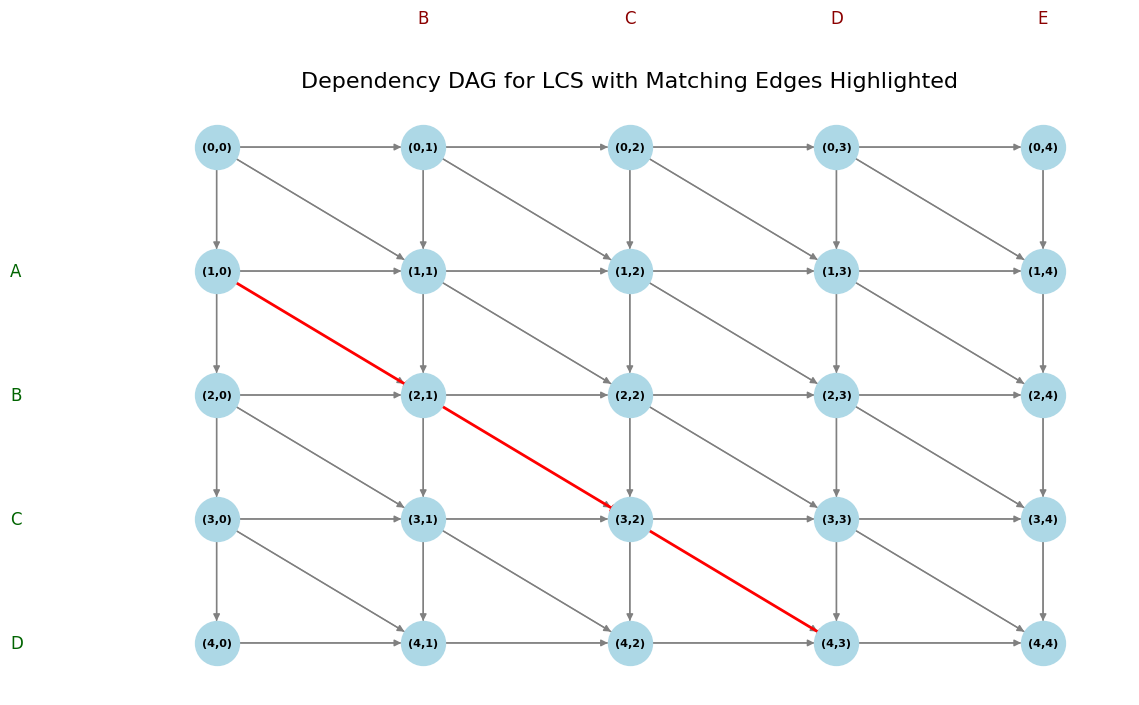

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

def lcs_dependency_dag(A, B):
    n, m = len(A), len(B)
    dag = nx.DiGraph()

    # Add nodes and dependencies
    for i in range(n + 1):
        for j in range(m + 1):
            node = f"({i},{j})"
            dag.add_node(node)
            
            # Add diagonal dependency (if characters match)
            if i > 0 and j > 0:
                dag.add_edge(f"({i-1},{j-1})", node, match=(A[i-1] == B[j-1]))
            
            # Add vertical dependency
            if i > 0:
                dag.add_edge(f"({i-1},{j})", node, match=False)
            
            # Add horizontal dependency
            if j > 0:
                dag.add_edge(f"({i},{j-1})", node, match=False)

    return dag

def draw_dependency_dag(dag, A, B):
    # Assign positions based on table layout
    pos = {}
    n, m = len(A), len(B)
    for i in range(n + 1):
        for j in range(m + 1):
            pos[f"({i},{j})"] = (j, -i)  # X: column (j), Y: row (i, flipped for top-to-bottom)

    # Separate edges by type
    red_edges = [(u, v) for u, v, d in dag.edges(data=True) if d["match"]]
    gray_edges = [(u, v) for u, v, d in dag.edges(data=True) if not d["match"]]

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(
        dag,
        pos,
        with_labels=True,
        node_size=1000,
        node_color="lightblue",
        font_size=8,
        font_weight="bold",
        edge_color="gray",
    )

    # Draw edges
    nx.draw_networkx_edges(dag, pos, edgelist=red_edges, edge_color="red", width=2)
    nx.draw_networkx_edges(dag, pos, edgelist=gray_edges, edge_color="gray", width=1)

    # Add labels for the strings
    for j, char in enumerate(" " + B):
        plt.text(j, 1, char, fontsize=12, ha="center", color="darkred")  # Above row 0
    for i, char in enumerate(" " + A):
        plt.text(-1, -i, char, fontsize=12, va="center", color="darkgreen")  # Left of column 0

    plt.title("Dependency DAG for LCS with Matching Edges Highlighted", fontsize=16)
    plt.show()

# Example usage
A = "ABCD"
B = "BCDE"
dag = lcs_dependency_dag(A, B)
draw_dependency_dag(dag, A, B)

We looked to find the maximum of the edges if you remember the code:

* `max(helper(i - 1, j), helper(i, j - 1))`

In [29]:
def lcs_top_down(X, Y):
    n, m = len(X), len(Y)
    memo = [[-1] * (m + 1) for _ in range(n + 1)]

    def helper(i, j):
        if i == 0 or j == 0:
            return 0
        if memo[i][j] != -1:
            return memo[i][j]
        if X[i - 1] == Y[j - 1]:
            memo[i][j] = 1 + helper(i - 1, j - 1)
        else:
            memo[i][j] = max(helper(i - 1, j), helper(i, j - 1))
        return memo[i][j]

    return helper(n, m)

In [30]:
A = "abcd"
B = "bcde"
print("LCS Length (Top-Down):", lcs_top_down(A, B))

LCS Length (Top-Down): 3


## Let's apply this principle to Shortest Paths

* Remember your DP principles - optimal substructure. 

* <b>Any subset of a shortest path, is a shortest path</b>. 

* Furthermore, if we're trying to find the shortest path - we're looking for the `min()` of all the incoming edges

![shortest_path](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Shortest_path_with_direct_weights.svg/512px-Shortest_path_with_direct_weights.svg.png)

Shortest path from A to F: 

A->C->E->D->F = 20

Substructures: 

A->C = 2

A->C->E = 5

A->C->E->D = 9 

## How can we compute this? 

* Remember we said that Dynamic Programming is 'careful brute force'... 

* If we don't know the answer - guess! 

* With DP - we try all the guesses and find the `min()` or `max()`

* If we're trying to find the shortest path - we're looking for 

## Indegrees and Outdegrees 

* Indegree: the number of edges coming to the vertex

* Outdegree: the number of edges coming out the vertex

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*C-aiojwAJBzzn8Jdw-xUwg.png" alt="indegree" width="650">  

## Relax edges

* Relaxing an edge in the context of graph algorithms means updating the shortest known distance to a vertex if a shorter path is found through that edge. 

* This operation is a key step in algorithms like Dijkstra’s algorithm and the Bellman-Ford algorithm.

![dijalgo2](https://2497063786-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LdGcqx-Ay6h4-DM_J08%2F-LdQqBd3uKWBVNik1EzU%2F-LdQqDsb98yf6tUa_Yif%2Fdijkstra.gif?alt=media&token=a2c261f8-3e0a-46ab-a6cc-abe9f6b2b934)

In [ ]:
def shortest_path_dag(vertices, edges, source):
    from collections import defaultdict, deque

    # Adjacency list and indegree calculation for topological sort
    graph = defaultdict(list)
    indegree = {v: 0 for v in vertices}

    for u, v, w in edges:
        graph[u].append((v, w))
        indegree[v] += 1

    # Topological sort
    queue = deque([v for v in vertices if indegree[v] == 0])
    top_order = []

    while queue:
        u = queue.popleft()
        top_order.append(u)
        for v, _ in graph[u]:
            indegree[v] -= 1
            if indegree[v] == 0:
                queue.append(v)

    # Initialize DP array
    dp = {v: float("inf") for v in vertices}
    dp[source] = 0

    # Relax edges in topological order
    for u in top_order:
        for v, w in graph[u]:
            if dp[u] + w < dp[v]:
                dp[v] = dp[u] + w

    return dp

In [37]:
from collections import deque

def topological_sort(graph):
    """
    Perform topological sort on a directed acyclic graph (DAG).
    
    Args:
    - graph: Dictionary representing the adjacency list of the graph.
             Example: {0: [(1, weight), (2, weight)], 1: [(3, weight)], 2: [(3, weight)], 3: []}
             
    Returns:
    - topo_order: List of nodes in topological order.
    """
    # Step 1: Compute in-degrees of all nodes
    in_degree = {node: 0 for node in graph}
    for u in graph:
        for v, _ in graph[u]:  # Only care about the target node, ignore the weight
            in_degree[v] += 1

    # Step 2: Collect all nodes with zero in-degree
    zero_in_degree = deque([node for node in in_degree if in_degree[node] == 0])
    topo_order = []

    # Step 3: Process nodes with zero in-degree
    while zero_in_degree:
        node = zero_in_degree.popleft()
        topo_order.append(node)

        # Reduce the in-degree of neighbors
        for neighbor, _ in graph[node]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                zero_in_degree.append(neighbor)

    # If the graph has a cycle, topological sort is not possible
    if len(topo_order) != len(graph):
        raise ValueError("Graph contains a cycle and is not a DAG!")

    return topo_order

## Shortest path - we look for the `min()` of all incoming edges

In [34]:
def shortest_path_dag(graph, source):
    n = len(graph)
    dp = [float('inf')] * n  # Initialize distances to infinity
    dp[source] = 0  # Distance to the source is 0

    # Topologically sort the graph
    topo_order = topological_sort(graph)

    for u in topo_order:
        for v, weight in graph[u]:
            dp[v] = min(dp[v], dp[u] + weight)

    return dp

## Longest path - we look for the `max()` of all incoming edges

In [35]:
def longest_path_dag(graph, source):
    n = len(graph)
    dp = [-float('inf')] * n  # Initialize distances to negative infinity
    dp[source] = 0  # Distance to the source is 0

    # Topologically sort the graph
    topo_order = topological_sort(graph)

    for u in topo_order:
        for v, weight in graph[u]:
            dp[v] = max(dp[v], dp[u] + weight)

    return dp

In [38]:
# Example graph as adjacency list (DAG)
# Node 0 -> [(1, weight), (2, weight), ...]
graph = {
    0: [(1, 2), (2, 4)],
    1: [(3, 7)],
    2: [(3, 1)],
    3: []
}

source = 0
print("Shortest Path:", shortest_path_dag(graph, source))
print("Longest Path:", longest_path_dag(graph, source))

Shortest Path: [0, 2, 4, 5]
Longest Path: [0, 2, 4, 9]


## Floyd Warshall - All Pairs 

* Dijkstra's algorithm: single-source shortest paths: 

```
start_node = 'A'
returned dictionary: {'A' : 0, 'B' : 5, 'C' : 7, 'D' : 15}
```

* Floyd Warshall is All-pairs shortest paths $O(|V|^3)$

```
{
    'A' : {'A': 0, 'B' : 5, 'C': 7, 'D': 15 },
    'B' : {'A': inf, 'B' : 0, 'C': 7, 'D': 15 },
    'C' : {'A': inf, 'B' : inf, 'C': 0, 'D': 15 },
    'D' : {'A': inf, 'B' : inf, 'C': inf, 'D': 0 },
}
```

* Notice below - three loops! 

* `min()` function


In [ ]:
def floyd_warshall(vertices, edges):
    # Initialize the DP table
    dp = {v: {u: float("inf") for u in vertices} for v in vertices}
    for v in vertices:
        dp[v][v] = 0

    for u, v, w in edges:
        dp[u][v] = w

    # Dynamic programming
    for k in vertices:
        for i in vertices:
            for j in vertices:
                dp[i][j] = min(dp[i][j], dp[i][k] + dp[k][j])

    return dp

## Alternatives - `networkx` has a `Floyd-Warshall` algorithm

In [8]:
import networkx as nx

# Create a weighted graph
G = nx.DiGraph()
G.add_weighted_edges_from([
    (0, 1, 4),
    (0, 2, 2),
    (1, 2, 3),
    (1, 3, 2),
    (2, 3, 1),
    (3, 1, 5)
])

# Floyd-Warshall for predecessor and distance
distance = nx.floyd_warshall(G)

# Print the shortest distance between all pairs of nodes
print("Shortest distances:")
for u in distance:
    for v in distance[u]:
        print(f"Distance from {u} to {v}: {distance[u][v]}")


Shortest distances:
Distance from 0 to 0: 0
Distance from 0 to 1: 4
Distance from 0 to 2: 2
Distance from 0 to 3: 3
Distance from 1 to 1: 0
Distance from 1 to 2: 3
Distance from 1 to 3: 2
Distance from 1 to 0: inf
Distance from 2 to 2: 0
Distance from 2 to 3: 1
Distance from 2 to 0: inf
Distance from 2 to 1: 6
Distance from 3 to 3: 0
Distance from 3 to 1: 5
Distance from 3 to 0: inf
Distance from 3 to 2: 8


In [9]:
distance

{0: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {0: 0, 1: 4, 2: 2, 3: 3}),
 1: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: 0, 2: 3, 3: 2, 0: inf}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {2: 0, 3: 1, 0: inf, 1: 6}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {3: 0, 1: 5, 0: inf, 2: 8})}

In [1]:
import networkx as nx

# Create a weighted graph
G = nx.DiGraph()
G.add_weighted_edges_from([
    (0, 1, 4),
    (0, 2, 2),
    (1, 2, 3),
    (1, 3, 2),
    (2, 3, 1),
    (3, 1, 5)
])

# Floyd-Warshall for predecessor and distance
predecessor, distance = nx.floyd_warshall_predecessor_and_distance(G)

# Print the shortest distance between all pairs of nodes
print("Shortest distances:")
for u in distance:
    for v in distance[u]:
        print(f"Distance from {u} to {v}: {distance[u][v]}")

# Print the predecessor dictionary
print("\nPredecessors:")
print(predecessor)

Shortest distances:
Distance from 0 to 0: 0
Distance from 0 to 1: 4
Distance from 0 to 2: 2
Distance from 0 to 3: 3
Distance from 1 to 1: 0
Distance from 1 to 2: 3
Distance from 1 to 3: 2
Distance from 1 to 0: inf
Distance from 2 to 2: 0
Distance from 2 to 3: 1
Distance from 2 to 0: inf
Distance from 2 to 1: 6
Distance from 3 to 3: 0
Distance from 3 to 1: 5
Distance from 3 to 0: inf
Distance from 3 to 2: 8

Predecessors:
{0: {1: 0, 2: 0, 3: 2}, 1: {2: 1, 3: 1}, 2: {3: 2, 1: 3}, 3: {1: 3, 2: 1}}


## Alternatives - `scipy` has a `Floyd-Warshall` algorithm

`pip install scipy`

`python3 -m pip install -U scipy --user`

In [14]:
from scipy.sparse.csgraph import floyd_warshall, bellman_ford
from scipy.sparse import csr_matrix

In [13]:
from scipy.sparse.csgraph import floyd_warshall, bellman_ford
from scipy.sparse import csr_matrix

# Create a graph as an adjacency matrix
graph = csr_matrix([
    [0, 4, 2, 0],
    [0, 0, 3, 2],
    [0, 0, 0, 1],
    [0, 5, 0, 0]
])

# Floyd-Warshall for all-pairs shortest paths
dist_matrix = floyd_warshall(graph, directed=True)
print("Floyd-Warshall Distance Matrix:")
print(dist_matrix)

# Bellman-Ford for shortest path from node 0
distances = bellman_ford(graph, directed=True, indices=0)
print("\nBellman-Ford Distances from node 0:")
print(distances)

Floyd-Warshall Distance Matrix:
[[ 0.  4.  2.  3.]
 [inf  0.  3.  2.]
 [inf  6.  0.  1.]
 [inf  5.  8.  0.]]

Bellman-Ford Distances from node 0:
[0. 4. 2. 3.]


## Bellman-Ford algorithm

* Works with negative weights (assuming no negative weight cycles)

* Application Richard Bellman's DP principles - gives us $O(VE)$ time

In [ ]:
def bellman_ford(vertices, edges, source):
    # Initialize distances
    dp = {v: float("inf") for v in vertices}
    dp[source] = 0

    # Relax edges |V| - 1 times
    for _ in range(len(vertices) - 1):
        for u, v, w in edges:
            if dp[u] != float("inf") and dp[u] + w < dp[v]:
                dp[v] = dp[u] + w

    # Check for negative-weight cycles
    for u, v, w in edges:
        if dp[u] != float("inf") and dp[u] + w < dp[v]:
            raise ValueError("Graph contains a negative-weight cycle")

    return dp

## Alternatives - `networkx` has a `Bellman-Ford` algorithm

In [3]:
import networkx as nx

# Create a weighted graph
G = nx.DiGraph()
G.add_weighted_edges_from([
    (0, 1, 4),
    (0, 2, 2),
    (1, 3, 2),
    (2, 3, 1),
    (3, 1, 5) 
])

# Bellman-Ford for shortest path and distance from source 0
source = 0
predecessor, distance = nx.bellman_ford_predecessor_and_distance(G, source)

# Print the shortest distances from the source
print(f"Shortest distances from node {source}:")
for node, dist in distance.items():
    print(f"Node {node}: {dist}")

# Print the predecessor dictionary
print("\nPredecessors:")
print(predecessor)

Shortest distances from node 0:
Node 0: 0
Node 1: 4
Node 2: 2
Node 3: 3

Predecessors:
{0: [], 1: [0], 2: [0], 3: [2]}


## Negative Weight Cycle - 

In [ ]:
import networkx as nx

# Create a weighted graph
G = nx.DiGraph()
G.add_weighted_edges_from([
    (0, 1, 4),
    (0, 2, 2),
    (1, 3, 2),
    (2, 3, 1),
    (3, 1, -5) # Negative Weight Cycle! 
])

# Bellman-Ford for shortest path and distance from source 0
source = 0
predecessor, distance = nx.bellman_ford_predecessor_and_distance(G, source)

# Print the shortest distances from the source
print(f"Shortest distances from node {source}:")
for node, dist in distance.items():
    print(f"Node {node}: {dist}")

# Print the predecessor dictionary
print("\nPredecessors:")
print(predecessor)

## Alternatives - `scipy` has a `Bellman-Ford` algorithm

In [15]:
from scipy.sparse.csgraph import bellman_ford
from scipy.sparse import csr_matrix

# Create a graph as an adjacency matrix
graph = csr_matrix([
    [0, 4, 2, 0],
    [0, 0, 3, 2],
    [0, 0, 0, 1],
    [0, 5, 0, 0]
])

# Bellman-Ford for shortest path from node 0
distances = bellman_ford(graph, directed=True, indices=0)
print("\nBellman-Ford Distances from node 0:")
print(distances)


Bellman-Ford Distances from node 0:
[0. 4. 2. 3.]


## Applying DP to a directed network:

* Some problems can be solved by drawing a directed network showing the possible decisions at each  stage. 

* You start at $S$ and can make one of several decisions. 

* Depending upon which one you take, you  can then take more decisions and so on, until you eventually reach $T$. 

* The easiest problems are about minimising the cost or time. This is, of course, the same as finding the  shortest path from $S$ to $T$. 

If the shortest/longest path from $S$ to $T$ is $SABCT$, 
* then: the shortest/longest path from $S$ to $C$ is $SABC$, 
* the shortest/longest path from $S$ to $B$ is $SAB$,  
* the shortest/longest path from $S$ to $A$ is $SA$,  
* and the shortest/longest path from $A$ to $C$ is $ABC$. 


Use the following terminology for dynamic programming problems presented in network  form:  

* `Stage` - The route from the initial stage (`S` say) to the final state (`T` say) is made up of a sequence of moves. Each move is a stage / a time interval or an option being considered. 

* `State` - Vertex you are considering / the value of a resource from a previous stage.

* `Action` - This is the directed arc from one state to the next. In selecting an arc you are  considering what happens if you do that action. / The amount of the resource used in the current stage.

* `Destination` This is the vertex you arrive at having taken the action. / The value of the resource passed to the next stage.   

* `Value` This is the sum of the weights on the arcs used in a sequence of actions. / This is the sum of the weights on the arcs used in a sequence of actions. 


## Network Flow 

* The flow in a network of nodes can also be modelled via a directed graph.

* Examples include: 
    * Natural energy: (water, gas, electricity etc) as it flows from source to destination. 
    * Transport (roads, trains, and even areoplanes)
    * Devices that communicate by sending packets of data across a network.

* Furthermore, we'll see that dynamic programming can be applied to network flow applications to calculate the maximum and minimum flows, and also optimise path finding.

* <b>The fundamental difference between graphs and networks, is that graphs focus on the distance, but networks focus on capacity (think volume) of flow between nodes/vertices.</b>

## Traffic flow example

* Road works (or engineering works that close railway lines!) are frustrating to travellers but essential for repair and maintenance. 

* This impacts the flow of traffic in a network, so we can model this real-life phenomenon with network flow. 

<img src="https://wealthandtax.co.uk/wp-content/uploads/2020/04/shutterstock_631880864-scaled.jpg" alt="roadworks" width="850">  

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('A', 'B', capacity=10)
G.add_edge('A', 'C', capacity=15)
G.add_edge('B', 'D', capacity=10)
G.add_edge('C', 'D', capacity=10)
G.add_edge('B', 'E', capacity=5)
G.add_edge('D', 'E', capacity=10)


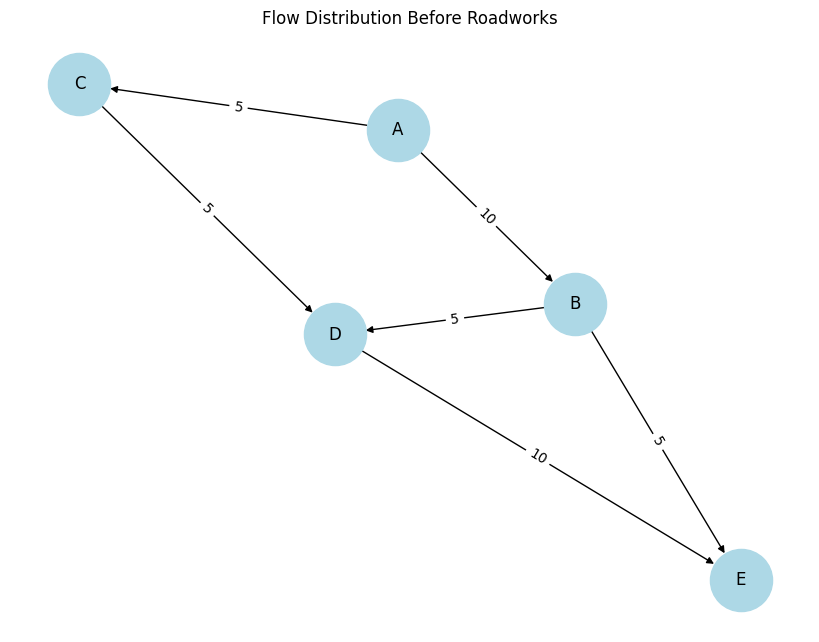

In [ ]:
import matplotlib.pyplot as plt

def visualize_flow(G, flow_dict, title):
    pos = nx.spring_layout(G)
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                edge_labels[(u, v)] = flow_dict[u][v]
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize initial flow
visualize_flow(G, initial_flow_dict, "Flow Distribution Before Roadworks")

## Maximum Flow via Edmonds-Karp vs Ford-Fulkerson

* The Edmonds-Karp algorithm is a specific implementation of the Ford-Fulkerson method 

* Edmonds-Karp employs Breadth-First Search (BFS) to find the shortest augmenting paths, thereby ensuring polynomial time complexity. $O(n^k)$

* Ford-Fulkerson Method:
    * A general algorithm to compute the maximum flow in a flow network.
	* It works by repeatedly finding augmenting paths from the source to the sink and increasing the flow until no more augmenting paths exist.
	* The method’s performance depends on how the augmenting paths are selected. Without a specific strategy, its time complexity can be unbounded, especially with irrational capacities.

* Edmonds-Karp Algorithm:
	* A specific implementation of the Ford-Fulkerson method.
	* It uses BFS to find the shortest (in terms of the number of edges) augmenting path in each iteration.
	* Guarantees a time complexity of  $O(V \times E^2)$  where  V  is the number of vertices and  E  is the number of edges.

* In summary, Edmonds-Karp is essentially Ford-Fulkerson with a specific path selection strategy (BFS), making it more efficient and predictable.


In [ ]:
def compute_max_flow(G, source, sink):
    # Compute the maximum flow using the Edmonds-Karp algorithm
    flow_value, flow_dict = nx.maximum_flow(G, source, sink, flow_func=nx.algorithms.flow.edmonds_karp)
    
    print(f"Maximum flow from {source} to {sink}: {flow_value} vehicles/hour")
    print("Flow distribution:")
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                print(f"  {u} -> {v}: {flow_dict[u][v]} vehicles/hour")
    print("\n")
    return flow_value, flow_dict

In [ ]:
print("=== Initial Scenario ===")
initial_flow, initial_flow_dict = compute_max_flow(G, source, sink)

=== Initial Scenario ===
Maximum flow from A to E: 15 vehicles/hour
Flow distribution:
  A -> B: 10 vehicles/hour
  A -> C: 5 vehicles/hour
  B -> D: 5 vehicles/hour
  B -> E: 5 vehicles/hour
  C -> D: 5 vehicles/hour
  D -> E: 10 vehicles/hour




In [ ]:
# Simulate roadworks: reduce capacity of C -> D from 10 to 5
G['C']['D']['capacity'] = 5

print("=== After Roadworks on C -> D ===")
new_flow, new_flow_dict = compute_max_flow(G, source, sink)

=== After Roadworks on C -> D ===
Maximum flow from A to E: 15 vehicles/hour
Flow distribution:
  A -> B: 10 vehicles/hour
  A -> C: 5 vehicles/hour
  B -> D: 5 vehicles/hour
  B -> E: 5 vehicles/hour
  C -> D: 5 vehicles/hour
  D -> E: 10 vehicles/hour




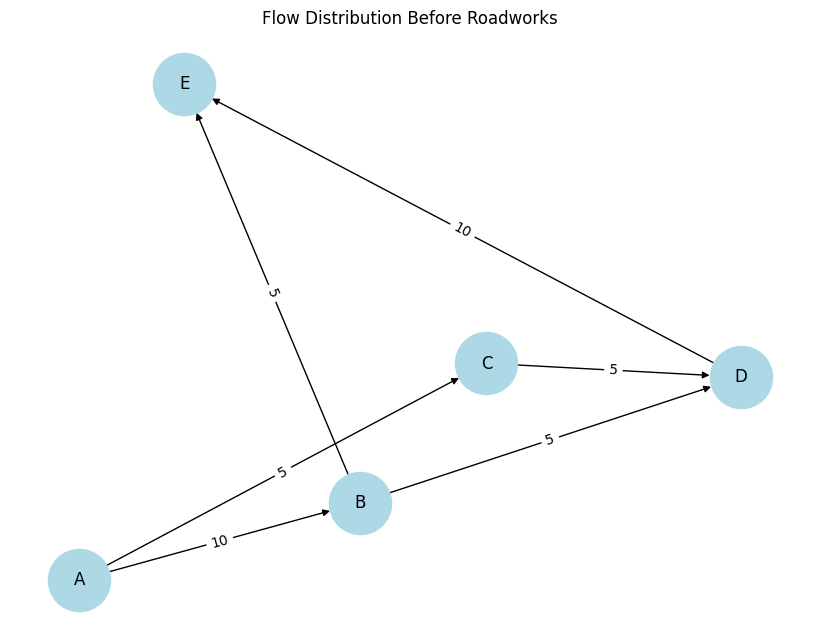

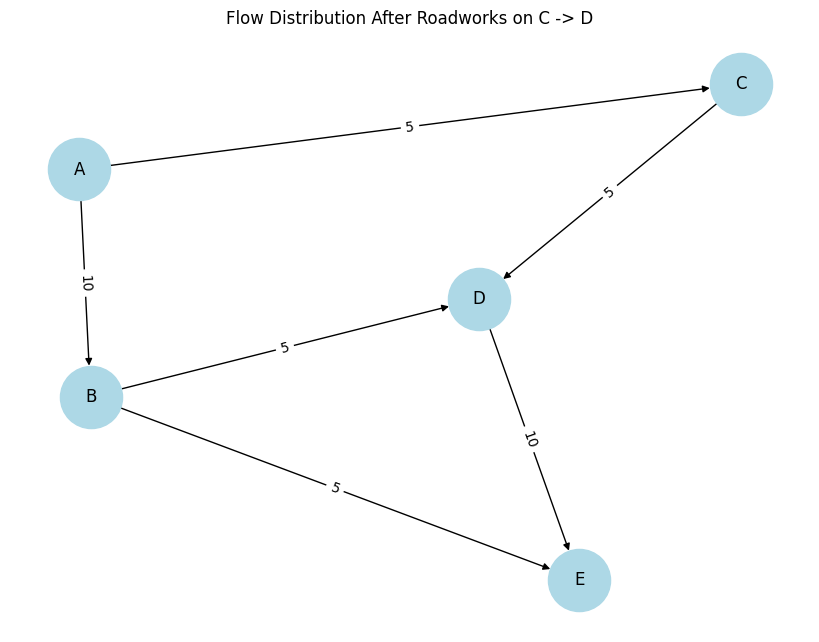

In [ ]:
import matplotlib.pyplot as plt

def visualize_flow(G, flow_dict, title):
    pos = nx.spring_layout(G)
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                edge_labels[(u, v)] = flow_dict[u][v]
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize initial flow
visualize_flow(G, initial_flow_dict, "Flow Distribution Before Roadworks")

# Visualize flow after roadworks
visualize_flow(G, new_flow_dict, "Flow Distribution After Roadworks on C -> D")

## minimax and maximin

* minimax route is one in which the maximum value of the individual arcs (edges) used is as small  as possible.

* A maximin route is one in which the minimum value of the individual arcs (edges) used is as large  as possible. 


What is Minimax?

* Minimax is a recursive decision-making algorithm used in adversarial environments, like two-player games. 

* The algorithm aims to:
	1.	Minimize the possible loss for the player if the opponent plays optimally.
	2.	Simultaneously maximize the possible gain by assuming both players act rationally.

* The process involves exploring all possible game states and choosing moves that optimize the worst-case scenario.

## Applying Dynamic Programming to network flows

* Maximin - Maximize the minimum capacity along a path

    * Optimising the most constrained link (bottleneck)

* Minimax - Minimize the maximum capacity (or other metric) along a path

    * Reduce the most overloaded / costly link

## Revisiting the traffic flow example: 

Initial Scenario:

* Path Identified: A → C → D → E
* Minimum Capacity: 10 vehicles/hour
* Interpretation: This path has a bottleneck capacity of 10 vehicles/hour, which is the smallest capacity along the path.
	
After Roadworks on C → D:

* Capacity Reduced: C → D from 10 to 5 vehicles/hour
* New Path Identified: A → B → D → E
* Minimum Capacity: 5 vehicles/hour
* Interpretation: Due to the roadworks reducing the capacity of C → D, the Maximin path shifts to A → B → D → E with a reduced minimum capacity of 5 vehicles/hour.

Advantages of the Maximin Approach

* Identifies Critical Paths: Highlights the most constrained paths in the network.
* Enhances Reliability: By focusing on maximizing the minimum capacity, it ensures that the weakest links are optimized.
* Facilitates Decision-Making: Helps in prioritizing infrastructure improvements or reallocating resources to critical sections.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('A', 'B', capacity=10)
G.add_edge('A', 'C', capacity=15)
G.add_edge('B', 'D', capacity=10)
G.add_edge('C', 'D', capacity=10)
G.add_edge('B', 'E', capacity=5)
G.add_edge('D', 'E', capacity=10)

In [ ]:
source = 'A'
sink = 'E'

In [ ]:
def visualize_path(G, path, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8,6))
    
    # Draw all nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Highlight the path
    if path:
        # Create a list of edge tuples in the path
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)
        edge_labels = {(u, v): G[u][v]['capacity'] for u, v in path_edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
def maximin_path(G, source, sink):
    """
    Finds the path from source to sink with the maximum minimum capacity.
    """
    import heapq

    # Initialize capacities to negative infinity
    max_min_capacity = {node: float('-inf') for node in G.nodes}
    max_min_capacity[source] = float('inf')

    # Priority queue: (current max min capacity, node, path)
    heap = [(-max_min_capacity[source], source, [])]

    visited = set()

    while heap:
        # Get the node with the current highest min capacity
        current_capacity, u, path = heapq.heappop(heap)
        current_capacity = -current_capacity

        if u in visited:
            continue
        visited.add(u)
        path = path + [u]

        if u == sink:
            return current_capacity, path

        for v in G.neighbors(u):
            if v not in visited:
                edge_capacity = G[u][v]['capacity']
                # The minimal capacity along the path is the min of current path and this edge
                min_capacity = min(current_capacity, edge_capacity)
                if min_capacity > max_min_capacity[v]:
                    max_min_capacity[v] = min_capacity
                    heapq.heappush(heap, (-max_min_capacity[v], v, path))
    
    return None, None  # No path found

=== Initial Maximin Path ===
Path: A -> C -> D -> E
Minimum capacity along this path: 10 vehicles/hour



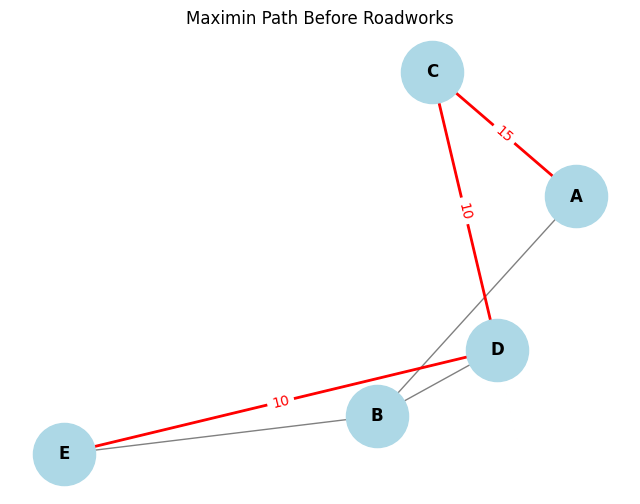

In [ ]:
# Find the maximin path
capacity, path = maximin_path(G, source, sink)

print("=== Initial Maximin Path ===")
print(f"Path: {' -> '.join(path)}")
print(f"Minimum capacity along this path: {capacity} vehicles/hour\n")

# Visualize the path
visualize_path(G, path, "Maximin Path Before Roadworks")

## Simulate Roadworks

In [ ]:
def simulate_roadworks(G, road, new_capacity):
    """
    Simulates roadworks by reducing the capacity of a specified road.
    """
    u, v = road
    if G.has_edge(u, v):
        G[u][v]['capacity'] = new_capacity
        print(f"Roadworks: Capacity of {u} -> {v} reduced to {new_capacity} vehicles/hour.\n")
    else:
        print(f"Error: Road {u} -> {v} does not exist in the network.\n")

=== Maximin Path After Roadworks on C -> D ===
Path: A -> C -> D -> E
Minimum capacity along this path: 10 vehicles/hour



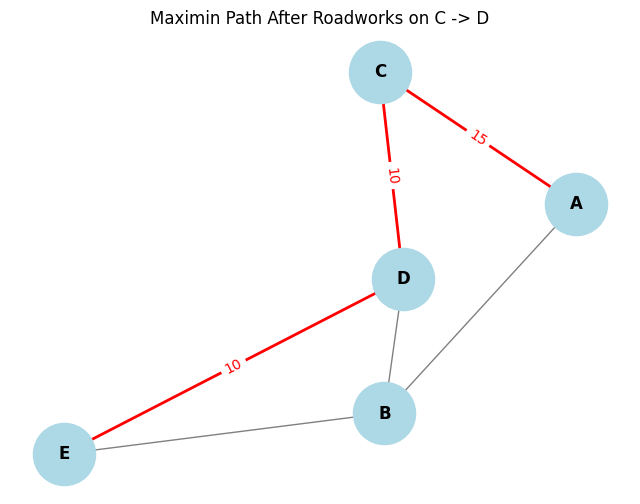

In [ ]:
# Recompute the maximin path after roadworks
new_capacity, new_path = maximin_path(G, source, sink)

print("=== Maximin Path After Roadworks on C -> D ===")
print(f"Path: {' -> '.join(new_path)}")
print(f"Minimum capacity along this path: {new_capacity} vehicles/hour\n")

# Visualize the new path
visualize_path(G, new_path, "Maximin Path After Roadworks on C -> D")

## Scenario Exercise - Blackjack (21)

![blackjack_21](https://odentennis.wordpress.com/wp-content/uploads/2022/02/blackjack.gif)


* This simulation will allow a user to play Blackjack against a dealer. The game will handle:

    * Shuffling and dealing cards.
    * Calculating hand values, considering the flexible value of Aces.
    * Allowing the player to choose actions: Hit or Stand.
    * Implementing the dealer’s fixed strategy: hitting until reaching at least 17.
    * Determining the outcome of each round.


## Let's build a simple simulation of 21/Blackjack

In [11]:
import random

In [12]:
cards = ['Ace of Hearts', '2 of Diamonds', 'King of Clubs', '7 of Spades']
print("Original deck:", cards)

random.shuffle(cards) # Shuffle the deck
print("Shuffled deck:", cards)

Original deck: ['Ace of Hearts', '2 of Diamonds', 'King of Clubs', '7 of Spades']
Shuffled deck: ['2 of Diamonds', '7 of Spades', 'Ace of Hearts', 'King of Clubs']


In [13]:
class Card:
    """Represents a single playing card."""
    def __init__(self, suit, rank):
        self.suit = suit  # 'Hearts', 'Diamonds', 'Clubs', 'Spades'
        self.rank = rank  # '2' - '10', 'J', 'Q', 'K', 'A'

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    """Represents a deck of 52 playing cards."""
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10',
             'J', 'Q', 'K', 'A']

    def __init__(self):
        self.cards = [Card(suit, rank) for suit in self.suits for rank in self.ranks]
        self.shuffle()

    def shuffle(self):
        """Shuffles the deck in place."""
        random.shuffle(self.cards)

    def deal_card(self):
        """Deals the top card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("All cards have been dealt")
        return self.cards.pop()

    def __str__(self):
        """Returns a string representation of the deck."""
        return ', '.join(str(card) for card in self.cards)

In [14]:
deck = Deck() # shuffle the deck
print("Shuffled Deck:")
print(deck)

Shuffled Deck:
6 of Diamonds, A of Clubs, 4 of Hearts, 2 of Diamonds, 10 of Hearts, 7 of Diamonds, 5 of Clubs, 8 of Hearts, 3 of Diamonds, J of Hearts, K of Hearts, 8 of Spades, 3 of Spades, 2 of Spades, K of Clubs, K of Spades, 2 of Clubs, A of Spades, 6 of Spades, 5 of Spades, A of Diamonds, 6 of Clubs, J of Clubs, 10 of Diamonds, Q of Clubs, 10 of Spades, 5 of Hearts, 3 of Hearts, K of Diamonds, 9 of Diamonds, 5 of Diamonds, Q of Spades, 4 of Diamonds, 3 of Clubs, 10 of Clubs, 2 of Hearts, Q of Diamonds, 7 of Hearts, 8 of Diamonds, 7 of Spades, A of Hearts, 9 of Hearts, 4 of Spades, J of Spades, 6 of Hearts, 9 of Spades, 9 of Clubs, J of Diamonds, 4 of Clubs, 7 of Clubs, 8 of Clubs, Q of Hearts


In [17]:
deck = Deck() # shuffle the deck

# Deal first two cards?
print("\nDeal two cards:")
for _ in range(2):
    card = deck.deal_card()
    print(card)

while True:
    print("\nStick (s) or Twist (t)?")
    ans = input("Stick (s) or Twist (t)?")
    if ans.lower() == "t" :
        card = deck.deal_card()
        print(card)
    else:
        break



Deal two cards:
4 of Hearts
Q of Hearts

Stick (s) or Twist (t)?
6 of Diamonds

Stick (s) or Twist (t)?


## Exercise - warm up on this example

To warm up, amend the code above to count the picture cards (J, Q, K) as ten, and give the choice of whether ace is 11 or 1. 


## Expand upon the Dynamic Programming to 21/Blackjack example





* `States (S)`: Represent the current situation in the game, typically defined by:
    * Player’s Hand Value: Sum of the player’s cards (considering soft and hard totals due to Aces).
    * Dealer’s Visible Card: The dealer’s upcard.
    * Additional Factors: Such as whether the player has a usable Ace, the number of decks in play, etc.

* `Actions (A)`: Possible decisions the player can make, e.g., hit, stand, double down, split.

* `Transition Probabilities (P)`: The likelihood of moving from one state to another based on the chosen action and the randomness of card drawing.

* `Rewards (R)`: The outcome of actions, typically:
    * Win: Positive reward.
    * Lose: Negative reward.
    * Push (Tie): Neutral reward.


## Scenario Exercise - Super-Mario 

![super_mario](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC3rfJrKWyXB02JJADPgFRtXKGbabn0GMq4g&s)

![super_mario_bros_1_nes](https://miro.medium.com/v2/resize:fit:1002/1*7TLBg5I9DSrvVwebZoA6JQ.gif)

Dynamic programming (DP) can be applied to Super Mario to solve complex problems by breaking them down into overlapping subproblems. In a game like Mario, DP can be used for:

1.	Pathfinding: Finding the shortest or optimal path in levels with obstacles.

2.	Coin Collection: Maximizing the number of coins collected by choosing the best route.

3.	Enemy Avoidance: Minimizing risk by finding paths with fewer or weaker enemies.

4.	Lives and Power-Ups Management: Optimally deciding when to collect power-ups or take risks for extra lives.

This approach involves storing and reusing solutions to subproblems to make the gameplay more efficient.

1. Pathfinding:

	* Break down each level into sub-levels (e.g., checkpoints or blocks).
	* Define a cost function for each block (e.g., time, obstacles).
	* Use DP to compute the minimum cost from the start to the finish, storing subproblem results for reuse.

2. Coin Collection:

	* Assign values to blocks containing coins.
	* Use DP to calculate the maximum coins collected along any possible path.

3. Enemy Avoidance:

	* Treat enemies as obstacles and define the risk (penalty) associated with each block.
	* Use DP to minimize the risk by evaluating all possible paths.

4. Lives and Power-Ups Management:

	* Store Mario’s current state (e.g., power-ups and lives).
	* Use DP to determine optimal power-up collection strategies by maximizing future gains.
	
Starting with a grid or graph representation of the game level will help lay the groundwork for each of these problems.

## MIT 6006 analysis of Super Mario Bros (NES 1993)

Goal: Run through and maximise score or minimise time lost

* Given level $n$ information
* Small screen $w$ x $h$ (320p)
* Configuration - Game state ($S$): every pixel / square on screen: $c^{w\cdot h}$
    * everything on screen 
    * Mario's Velocity 
* Score ($S$) 
* Time ($T$)
* Screen vs Level 

$O(w \cdot c^{w\cdot h} \cdot S \cdot T) $




* Can draw a graph for all configurations of the above

* For every configration, what are the possible things you could do? 
    * Constant number of choice 

DP: all of the above are subproblems.

Can relate this subproblem to a constant number of other subproblems.

You only pay constant time per subproblem. $O(1)$

Psuedo-polynomial with respect to $S$ and $T$


## Summary 

* <b>Top-down approach</b> (Memoization with recursion)
   
* <b>Bottom-down approach</b>: (Tabulation with iteration)

* Shortest paths - topological sort 

* Network flows - minimax can be DP-ified! 

* Virtually any problem with repeating subproblems can be DP-ified!

## Exercise 

Write the Bellman-Ford algorithm with a dynamic programming table.

In [ ]:
def bellman_ford_dp(vertices, edges, source):
    ...

In [2]:
V = 5

# Edges (u, v, weight)
edges = [
    (0, 1, -1),
    (0, 2, 4),
    (1, 2, 3),
    (1, 3, 2),
    (1, 4, 2),
    (3, 2, 5),
    (3, 1, 1),
    (4, 3, -3),
]

# Compute shortest paths from vertex 0
distances = bellman_ford_dp(V, edges, 0)

if distances:
    print("Vertex\tDistance from Source")
    for i, d in enumerate(distances):
        print(f"{i}\t{d}")

Vertex	Distance from Source
0	0
1	-1
2	2
3	-2
4	1


## Exercise 

Given a directed graph $G$ with $n$ nodes and $m$ edges, each edge $(u, v)$ has a capacity $c(u, v)$. Determine the maximum possible flow from a source $s$ to a sink $t$, such that the maximum flow through any single edge is minimized.

This problem minimizes the “bottleneck” of the network, ensuring that no single edge carries an excessive amount of the flow.

## Exericse

Given a flow network, find a path from $s$ to $t$ such that the minimum edge capacity along the path is maximized.

Given a directed graph $G$ with $n$ nodes and $m$ edges, find the maximum flow $F$ from source $s$ to sink $t$, such that the minimum flow through any edge in the solution is maximized.

Extension: This problem maximizes the smallest amount of flow on any edge used in the final flow, ensuring a “balanced” distribution of flow across the network.